# Pharmaceutical Sales Analysis
Author: Jeff Magill

Problem follows:
https://towardsdatascience.com/analysing-pharmaceutical-sales-data-in-python-6ce74da818ab

Pharma data: https://www.kaggle.com/milanzdravkovic/pharma-sales-data

(saved locally in ./data/)

## Tasks:
1. On which day of the week is the second drug (M01AE) most often sold?
2. Which three drugs have the highest sales in January 2015, July 2016, September 2017.
3. Which drug has sold most often on Mondays in 2017?
4. What medicine sales may be in January 2020? (Our data set only contains information about sales from January 2014 to October 2019)

In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's take a quick peek at the data.

In [2]:
%ls data/

salesdaily.csv*  saleshourly.csv*  salesmonthly.csv*  salesweekly.csv*


In [3]:
datafiles = ['salesdaily.csv', 'saleshourly.csv', 'salesmonthly.csv', 'salesweekly.csv']
for file in datafiles:
    print(file)
    print(pd.read_csv('data/' + file))
    print('\n')

salesdaily.csv
          datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0      1/2/2014   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1      1/3/2014   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2      1/4/2014   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3      1/5/2014   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4      1/6/2014   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101  10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102  10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103  10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104  10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105  10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   2

Ok, looks like each table lists the number of sales of various drugs across columns, where each file bins the count into differently sized time bins. I would normally at this point sanity check this is true by recreating the larger bins from the smaller and verifying, but I will skip that this time. Quick math from a few listed above checks out, so I will trust the data provided. Additionally, I would normally throw together some simple plots of this data so the whole set can be visualized at once for trends/oddities/extrema, but I will stick to the requested tasks.

### Problem 1: On which day of the week is the second drug (M01AE) most often sold?

Use the daily bins table for convenience. It comes with the name of the day in a column already, so I just have to group by those names.

In [4]:
daily = pd.read_csv('data/salesdaily.csv')
daily.groupby(by='Weekday Name').sum().sort_values(by='M01AE', ascending=False)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
Weekday Name,,,,,,,,,,,
Sunday,1591.439583,1384.939667,1055.887500,10051.250500,1744.866667,100.708333,1571.833333,900.511667,606937,1912,83076
Saturday,1724.054167,1311.554917,1262.671667,10107.495333,2580.941667,164.750000,1629.666667,986.460000,606936,1914,83076
Monday,1521.776667,1118.503000,1171.765667,8799.013000,2783.316667,185.458333,1791.458333,871.525000,606938,1910,83076
Friday,1435.913333,1117.781083,1167.448333,8606.187167,2979.233333,229.500000,1756.041667,842.386667,606936,1904,83076
Wednesday,1439.206667,1110.250000,1131.431667,8422.354167,3037.183333,196.250000,1635.000000,799.851667,604920,1907,82800
Thursday,1369.300000,1092.282396,1110.037500,8478.629375,2623.429167,154.125000,1595.625000,788.960833,606935,1906,83048
Tuesday,1519.246667,1069.307583,1272.966667,8540.473167,2896.766667,219.166667,1629.197917,918.121667,606939,1908,82990


Here the solution is revealed to be **Sunday**.

### Problem 2: Which three drugs have the highest sales in January 2015, July 2016, September 2017.

Now using monthly for convenience. I will write these requested months into matching format as a list and find the max sales in each.

In [5]:
months = ['2015-01-31', '2016-07-31', '2017-09-30']
monthly = pd.read_csv('data/salesmonthly.csv')
drugs = list(monthly.columns)[1:] # remove 'datum' name
highest_sales = [monthly.loc[monthly.datum==month][drugs].idxmax(axis='columns').iloc[0] for month in months]
print('Highest sold drug by month:')
for i in range(len(months)):
    print('%s:\t%s' % (months[i], highest_sales[i]))

Highest sold drug by month:
2015-01-31:	N02BE
2016-07-31:	N02BE
2017-09-30:	N02BE


### Problem 3: Which drug has sold most often on Mondays in 2017?

Using daily again. I can select Mondays in 2017 and then take the sum for each drug.

In [6]:
daily.loc[daily['Year'] == 2017].loc[daily['Weekday Name'] == 'Monday'][drugs].sum().sort_values(ascending=False)

N02BE    1160.560000
N05B      320.583333
R03       267.458333
M01AB     243.496667
N02BA     170.541667
M01AE     161.875000
R06       134.925000
N05C       30.458333
dtype: float64

### Problem 4: What medicine sales may be in January 2020?

Very rough and unpolished, but I spent a little time adding some periodicity features to capture some effects of month-of-the-year that were obviously important in several of the drugs from looking at the raw data.

Predicted sales of M01AB in Jan. 2020:	138.84
	coefficient of determination: 0.07
Predicted sales of M01AE in Jan. 2020:	114.01
	coefficient of determination: 0.01
Predicted sales of N02BA in Jan. 2020:	72.27
	coefficient of determination: 0.46
Predicted sales of N02BE in Jan. 2020:	903.71
	coefficient of determination: 0.12
Predicted sales of N05B in Jan. 2020:	195.20
	coefficient of determination: 0.17
Predicted sales of N05C in Jan. 2020:	16.93
	coefficient of determination: 0.01
Predicted sales of R03 in Jan. 2020:	227.57
	coefficient of determination: 0.19
Predicted sales of R06 in Jan. 2020:	65.82
	coefficient of determination: 0.52


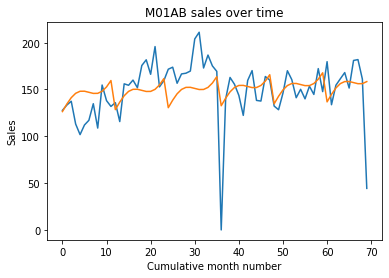

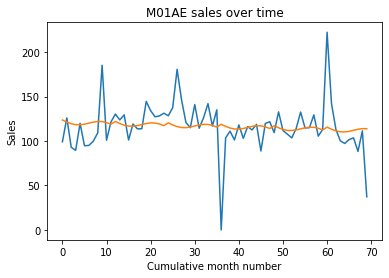

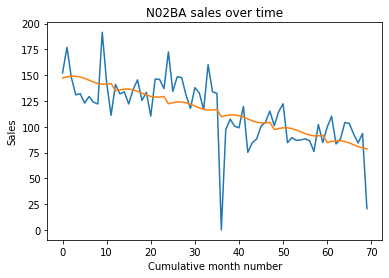

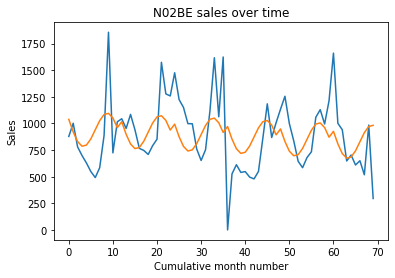

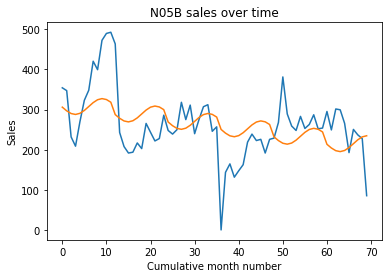

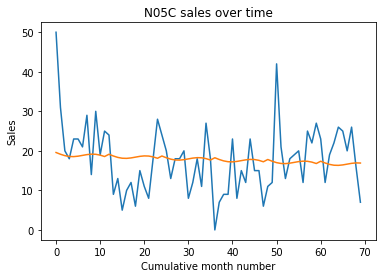

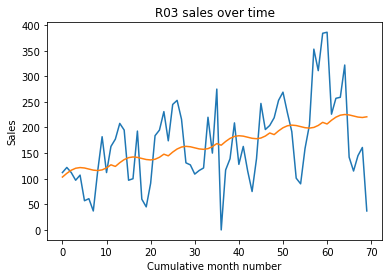

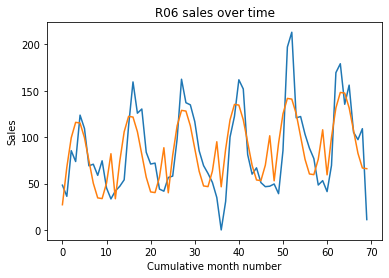

In [15]:
to_predict_x = [[72, 0, 0]] # in this construction, this is Jan 2020
xs = np.hstack((
    monthly.index.values.reshape(-1,1),
    (monthly.index.values%12).reshape(-1,1), # month of the year
    np.sin(monthly.index.values/6*np.pi).reshape(-1,1) # sin of month of the year
))

for i,drug in enumerate(drugs):
    ys = monthly[drug].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(xs, ys)
    
    plt.figure(i)
    plt.plot(xs[:,0], ys)
    plt.plot(regr.predict(xs))
    plt.title(drug + ' sales over time')
    plt.xlabel('Cumulative month number')
    plt.ylabel('Sales')
    
    print('Predicted sales of %s in Jan. 2020:\t%.2f' % (drug, regr.predict(to_predict_x)[0,0]))
    print('\tcoefficient of determination: %.2f' % regr.score(xs,ys))